In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

In [2]:
#df=pd.read_csv("https://raw.githubusercontent.com/anjali1729/Thyroid-Disease-Classification/master/thyroid.csv")
#df.to_csv("thyroid.csv")
df=pd.read_csv("thyroid.csv")

df = df.dropna(axis=0)

le=LabelEncoder()
df["Classes"]=le.fit_transform(df["Classes"])
df["Sex"]=le.fit_transform(df["Sex"])
for col in df.columns:
        if df[col].dtype == 'object':
            #print(col)
            df[col] = df[col].map({'f': 0, 't': 1})
            
df["TSH"]=df["TSH"].astype(float)   
df["T3"]=df["T3"].astype(float)
df["TT4"]=df["TT4"].astype(float)   
df["T4U"]=df["T4U"].astype(float)    
df["FTI"]=df["FTI"].astype(float)

print(df)

      Unnamed: 0   Age  Sex  on thyroxine  query on thyroxine  \
0              0  41.0    0             0                   0   
1              1  70.0    0             0                   0   
2              2  80.0    0             0                   0   
3              3  66.0    0             0                   0   
4              4  68.0    1             0                   0   
...          ...   ...  ...           ...                 ...   
2071        2071  70.0    1             0                   0   
2072        2072  67.0    1             0                   0   
2073        2073  82.0    0             0                   0   
2074        2074  25.0    0             0                   0   
2076        2076  81.0    0             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0   
1                             0     0         0                0   
2              

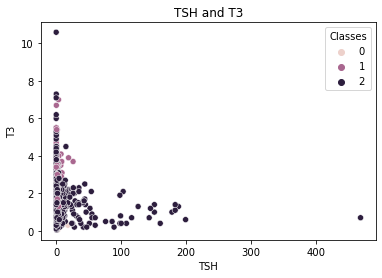

In [3]:
sns.scatterplot(x='TSH',y='T3',hue='Classes', data=df)
plt.title("TSH and T3")
plt.show()


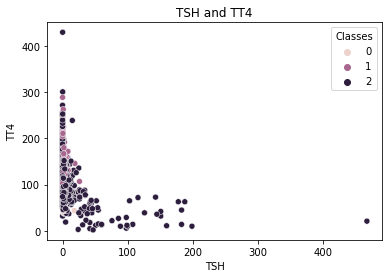

In [4]:
sns.scatterplot(x='TSH',y='TT4',hue='Classes', data=df)
plt.title("TSH and TT4")
plt.show()


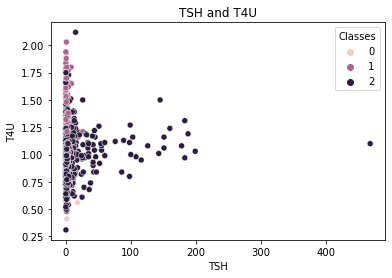

In [5]:
sns.scatterplot(x='TSH',y='T4U',hue='Classes', data=df)
plt.title("TSH and T4U")
plt.show()


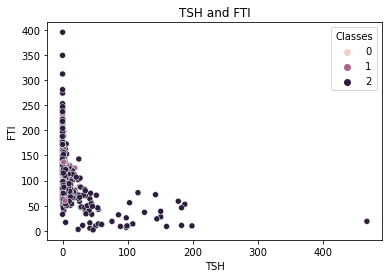

In [6]:
sns.scatterplot(x='TSH',y='FTI',hue='Classes', data=df)
plt.title("TSH and FTI")
plt.show()

In [12]:
x_columns=["TSH","T3","T4U","FTI"]
target="Classes"
X=df[x_columns]
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Lasso picked 1 variables and eliminated the other 3 variables


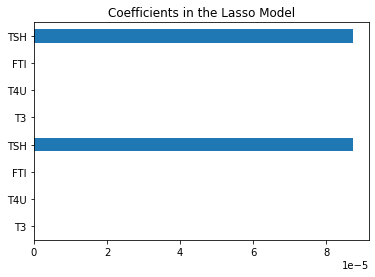

In [13]:
alpha=0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
coef = pd.Series(lasso.coef_, index=X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                          coef.sort_values().tail(10)])
imp_coef.plot(kind="barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [16]:
lgb_clf = LGBMClassifier(objective='multiclass',
    boosting_type='gbdt',
    max_depth=10,
    num_leaves=500,
    learning_rate=0.3,
    eval_metric=['accuracy','softmax'],
    num_class=3,
    n_jobs=1,
    #early_stopping_rounds=100,
    num_iterations=1500)

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: eval_metric
0.9657853810264385


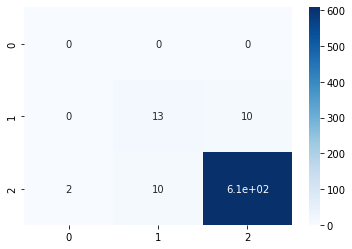

In [17]:
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)

print(accuracy_score(y_pred, y_test))
cm=confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

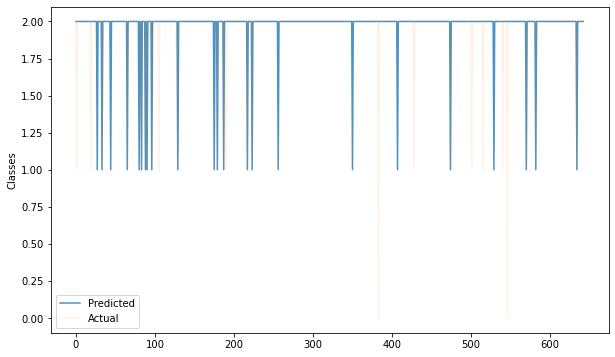

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted',alpha=0.8)
plt.plot(y_test.values, label='Actual',alpha=0.1)
plt.ylabel('Classes')
plt.legend()